In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from textblob import Word
from spellchecker import SpellChecker
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter


In [ ]:
df=pd.read_csv("/content/amazon.csv")
df.shape

(4915, 12)

In [ ]:
df.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [ ]:
# Drop the rows that contain null values
df = df.dropna()


In [ ]:
df_sorted = df.reindex(sorted(df.columns), axis=1)

# get the count of unique values in each column
unique_counts = df_sorted.apply(pd.Series.nunique)

# combine the column names and unique counts into a new DataFrame
result = pd.DataFrame({'Column': unique_counts.index, 'Unique Count': unique_counts.values})


In [ ]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5,It's mini storage. It doesn't do anything els...,29-04-2013,588,0,0,0,0,0.0,0.0


In [ ]:
print(result)

                  Column  Unique Count
0             Unnamed: 0          4913
1               day_diff           689
2             helpful_no            17
3            helpful_yes            23
4                overall             5
5             reviewText          4912
6             reviewTime           689
7           reviewerName          4593
8   score_average_rating            28
9     score_pos_neg_diff            27
10            total_vote            26
11    wilson_lower_bound            40


In [ ]:
# drop the column named "Unnamed"
df = df.drop('Unnamed: 0', axis=1)
# Drop irrelevant columns
df.drop(['reviewerName', 'reviewTime', 'helpful_yes', 'helpful_no', 'total_vote'], axis=1, inplace=True)
df.head()


,overall,reviewText,day_diff,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,5,"Purchased this for my device, it worked as adv...",409,0,0.0,0.0
2,4,it works as expected. I should have sprung for...,715,0,0.0,0.0
3,5,This think has worked out great.Had a diff. br...,382,0,0.0,0.0
4,5,"Bought it with Retail Packaging, arrived legit...",513,0,0.0,0.0
5,5,It's mini storage. It doesn't do anything els...,588,0,0.0,0.0


In [ ]:
df.isnull().sum()

Rating                0
Review                0
Days_Since_Review     0
Score_Diff            0
Average_Rating        0
Wilson_Lower_Bound    0
dtype: int64

In [ ]:
df.dtypes

Rating                  int64
Review                 object
Days_Since_Review       int64
Score_Diff              int64
Average_Rating        float64
Wilson_Lower_Bound    float64
dtype: object

In [ ]:
df.head()

,Rating,Review,Days_Since_Review,Score_Diff,Average_Rating,Wilson_Lower_Bound
1,5,"Purchased this for my device, it worked as adv...",409,0,0.0,0.0
2,4,it works as expected. I should have sprung for...,715,0,0.0,0.0
3,5,This think has worked out great.Had a diff. br...,382,0,0.0,0.0
4,5,"Bought it with Retail Packaging, arrived legit...",513,0,0.0,0.0
5,5,It's mini storage. It doesn't do anything els...,588,0,0.0,0.0


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


data preprocessing


In [ ]:
df.head()
import nltk

In [ ]:


# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# Standardize the format of the data
df['Review'] = df['Review'].apply(lambda x: x.lower().strip())

# Tokenization
df['tokens'] = df['Review'].apply(lambda x: word_tokenize(x))

# Stop word removal
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
porter = PorterStemmer()
df['stemmed_tokens'] = df['tokens'].apply(lambda x: [porter.stem(word) for word in x])

# Add a new column to the DataFrame with the sentiment score for each review
df['sentiment_score'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Add a new column to the DataFrame with the sentiment label for each review
df['sentiment'] = df['sentiment_score'].apply(get_sentiment_label)

# Define a function to assign sentiment labels to each review
def get_sentiment_label(score):
    if score >= 0.5:
        return 'positive'
    elif score <= -0.5:
        return 'negative'
    else:
        return 'neutral'

# Print the cleaned DataFrame
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


   Rating                                             Review  \
1       5  purchased this for my device, it worked as adv...   
2       4  it works as expected. i should have sprung for...   
3       5  this think has worked out great.had a diff. br...   
4       5  bought it with retail packaging, arrived legit...   
5       5  it's mini storage.  it doesn't do anything els...   

   Days_Since_Review  Score_Diff  Average_Rating  Wilson_Lower_Bound  \
1                409           0             0.0                 0.0   
2                715           0             0.0                 0.0   
3                382           0             0.0                 0.0   
4                513           0             0.0                 0.0   
5                588           0             0.0                 0.0   

                                              tokens  \
1  [purchased, device, ,, worked, advertised, ., ...   
2  [works, expected, ., sprung, higher, capacity,...   
3  [think, wor

In [ ]:
df.head()

,Rating,Review,Days_Since_Review,Score_Diff,Average_Rating,Wilson_Lower_Bound,tokens,stemmed_tokens,sentiment_score,sentiment
1,5,"purchased this for my device, it worked as adv...",409,0,0.0,0.0,"[purchased, device, ,, worked, advertised, ., ...","[purchas, devic, ,, work, advertis, ., never, ...",-0.2960,neutral
2,4,it works as expected. i should have sprung for...,715,0,0.0,0.0,"[works, expected, ., sprung, higher, capacity,...","[work, expect, ., sprung, higher, capac, ., th...",-0.3089,neutral
3,5,this think has worked out great.had a diff. br...,382,0,0.0,0.0,"[think, worked, great.had, diff, ., bran, 64gb...","[think, work, great.had, diff, ., bran, 64gb, ...",0.7081,positive
4,5,"bought it with retail packaging, arrived legit...",513,0,0.0,0.0,"[bought, retail, packaging, ,, arrived, legit,...","[bought, retail, packag, ,, arriv, legit, ,, o...",0.7087,positive
5,5,it's mini storage. it doesn't do anything els...,588,0,0.0,0.0,"['s, mini, storage, ., n't, anything, else, 's...","['s, mini, storag, ., n't, anyth, els, 's, sup...",0.0000,neutral


In [ ]:
# Import necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score of a text
def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# Get the sentiment score for each review
df['Sentiment Score'] = df['Review'].apply(lambda x: get_sentiment_score(x))


In [ ]:
df.head()

,Rating,Review,Days_Since_Review,Score_Diff,Average_Rating,Wilson_Lower_Bound,tokens,stemmed_tokens,sentiment_score,sentiment,Sentiment Score
1,5,"purchased this for my device, it worked as adv...",409,0,0.0,0.0,"[purchased, device, ,, worked, advertised, ., ...","[purchas, devic, ,, work, advertis, ., never, ...",-0.2960,neutral,-0.2960
2,4,it works as expected. i should have sprung for...,715,0,0.0,0.0,"[works, expected, ., sprung, higher, capacity,...","[work, expect, ., sprung, higher, capac, ., th...",-0.3089,neutral,-0.3089
3,5,this think has worked out great.had a diff. br...,382,0,0.0,0.0,"[think, worked, great.had, diff, ., bran, 64gb...","[think, work, great.had, diff, ., bran, 64gb, ...",0.7081,positive,0.7081
4,5,"bought it with retail packaging, arrived legit...",513,0,0.0,0.0,"[bought, retail, packaging, ,, arrived, legit,...","[bought, retail, packag, ,, arriv, legit, ,, o...",0.7087,positive,0.7087
5,5,it's mini storage. it doesn't do anything els...,588,0,0.0,0.0,"['s, mini, storage, ., n't, anything, else, 's...","['s, mini, storag, ., n't, anyth, els, 's, sup...",0.0000,neutral,0.0000


            Rating  Days_Since_Review   Score_Diff  Average_Rating  \
count  4913.000000        4913.000000  4913.000000     4913.000000   
mean      4.587625         437.346224     1.100957        0.075363   
std       0.996995         209.360537    39.375960        0.255973   
min       1.000000           1.000000  -130.000000        0.000000   
25%       5.000000         281.000000     0.000000        0.000000   
50%       5.000000         431.000000     0.000000        0.000000   
75%       5.000000         601.000000     0.000000        0.000000   
max       5.000000        1064.000000  1884.000000        1.000000   

       Wilson_Lower_Bound  
count         4913.000000  
mean             0.020019  
std              0.077156  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              0.957544  


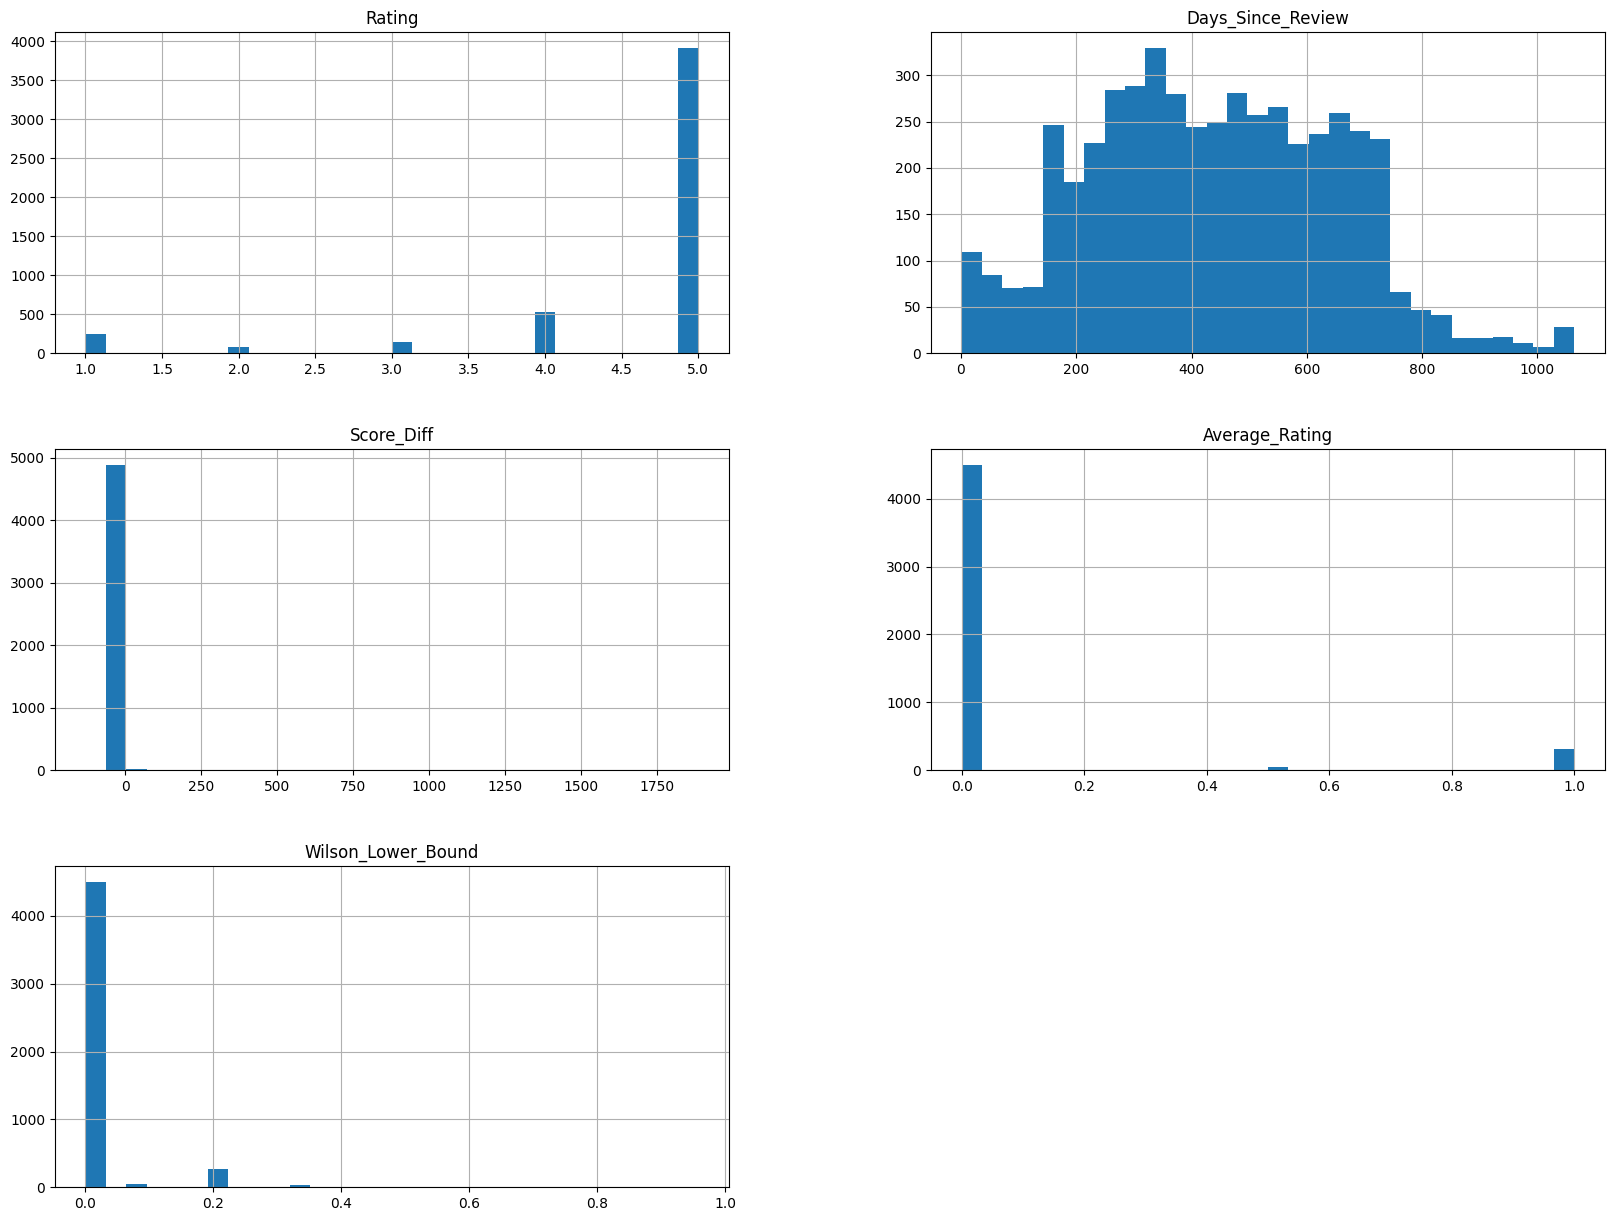

<ipython-input-144-9d45f6e4eaaa>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


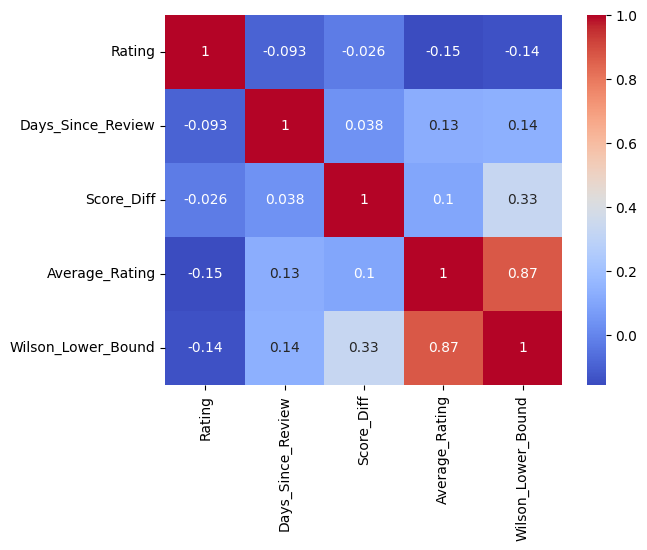

In [ ]:


# Rename columns for better readability
df.columns = ['Rating', 'Review', 'Days_Since_Review', 'Score_Diff', 'Average_Rating', 'Wilson_Lower_Bound']

# Perform descriptive statistics
print(df.describe())

# Plot histograms for each column
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Plot correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


